In [341]:
import pandas as pd

In [342]:
df=pd.read_csv('./data/house_price_clean.csv')
df

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


<Axes: >

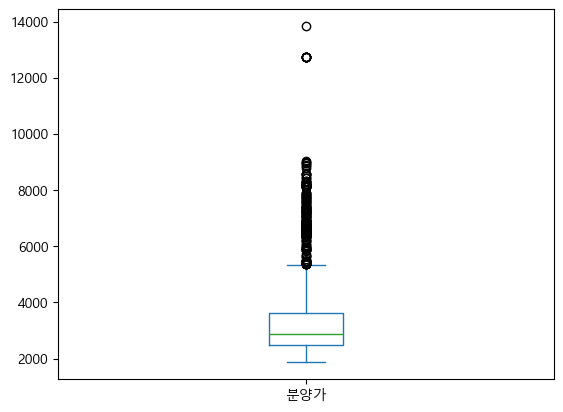

In [343]:
df['분양가'].plot(kind='box')

In [345]:
df['분양가'].describe()

count     3293.000000
mean      3294.067112
std       1321.781979
min       1868.000000
25%       2478.000000
50%       2887.000000
75%       3632.000000
max      13835.000000
Name: 분양가, dtype: float64

In [347]:
IQR=3632-2478
max_outlier=3632 + (IQR*1.5)
max_outlier

5363.0

<Axes: xlabel='지역'>

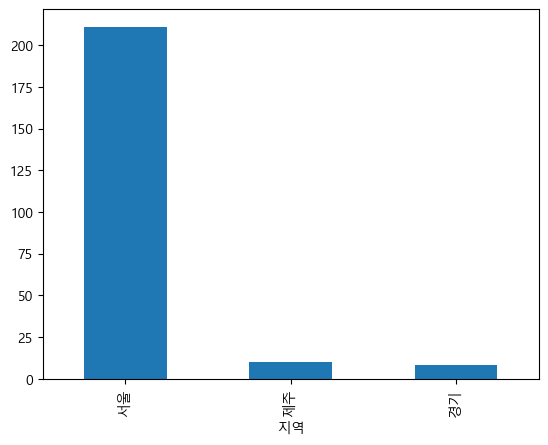

In [353]:
df[df['분양가']>=max_outlier].value_counts('지역').plot(kind='bar')

In [352]:
df.sort_values('분양가',ascending=False)

,지역,규모,연도,월,분양가
3236,서울,85㎡초과 102㎡이하,2020,2,13835
3058,서울,85㎡초과 102㎡이하,2019,11,12728
2997,서울,85㎡초과 102㎡이하,2019,10,12728
2937,서울,85㎡초과 102㎡이하,2019,9,12728
2760,서울,85㎡초과 102㎡이하,2019,6,12728
...,...,...,...,...,...
178,전남,60㎡초과 85㎡이하,2015,12,1906
242,전남,60㎡초과 85㎡이하,2016,1,1906
114,전남,60㎡초과 85㎡이하,2015,11,1906
425,전북,60㎡이하,2016,4,1900


In [362]:
df[df['분양가']>=df['분양가'].quantile(0.9)]

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3241,인천,102㎡초과,2020,2,4958
3242,경기,60㎡이하,2020,2,4918
3244,경기,85㎡초과 102㎡이하,2020,2,5418
3245,경기,102㎡초과,2020,2,5133


In [365]:
df[df['분양가']>=df['분양가'].quantile(0.9)].shape

(330, 5)

In [374]:
df[df['분양가']<=df['분양가'].quantile(0.1)]['지역'].value_counts()

지역
강원    77
전남    75
충북    72
전북    56
경북    23
충남    18
제주     5
광주     2
경남     2
Name: count, dtype: int64

In [368]:
df[df['분양가']>=df['분양가'].quantile(0.99)].shape

(33, 5)

In [381]:
mn,c,mx=df['분양가'].quantile([0.25,0.5,0.75])
# print('mn=',mn)
# print('c=',c)
# print('mx=',mx)
IQR=mx-mn
max_ol=mx+(IQR*1.5)
min_ol=mn-(IQR*1.5)
print('max_ol=',max_ol)
print('min_ol=',min_ol)

max_ol= 5363.0
min_ol= 747.0


<Axes: >

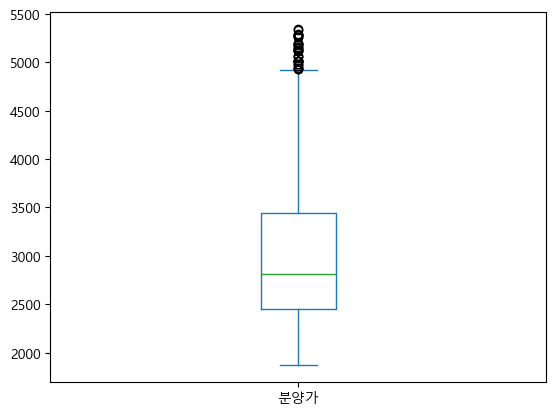

In [394]:
# max_ol => max_ol_df
max_ol_df=df[df['분양가']>=max_ol].reset_index(drop=True)
max_ol_df
# min_ol => min_ol_df
min_ol_df=df[df['분양가']<=min_ol]
min_ol_df
# normal => narmal_df

con1=df['분양가']<=max_ol
con2=df['분양가']>=min_ol
normal_df=df[con1&con2].reset_index(drop=True)
normal_df

normal_df['분양가'].plot(kind='box')


In [377]:
df['분양가'].describe()

count     3293.000000
mean      3294.067112
std       1321.781979
min       1868.000000
25%       2478.000000
50%       2887.000000
75%       3632.000000
max      13835.000000
Name: 분양가, dtype: float64